# Eine Analyse zur Weinqualität

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import chi2_contingency
import numpy as np 
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
import statsmodels.api as sm

## 1. Intro:

#### **1.1 Motivation und Stakeholder des Projekts**

**Ziel des Projekts**: Identifizierung wesentlicher Einflussfaktoren der Weinqualität und Formulierung umsetzbarer Empfehlungen für alle Beteiligten in der Weinindustrie.

In diesem Projekt konzentrieren wir uns darauf, einen umfangreichen Datensatz mit verschiedenen Attributen von Weinen zu untersuchen, um die Schlüsselfaktoren zu identifizieren, die die Qualität eines Weins beeinflussen. Diese Analyse hat das Potenzial, wertvolle Erkenntnisse sowohl für die Weinherstellung als auch für die Weinwahl zu liefern.

Die Ergebnisse dieses Projekts sind für eine Vielzahl von Interessengruppen relevant:
- **Winzer und Weingärtner**, die ihre Produktionsprozesse optimieren möchten, um die Qualität ihrer Weine zu steigern
- **Weinhändler und -sommelier**, die ein tieferes Verständnis der Faktoren anstreben, die den Weingenuss beeinflussen
- **Weinliebhaber**, die durch fundierte Informationen ihre Kaufentscheidungen besser auf ihre persönlichen Vorlieben abstimmen können

#### **1.2 Fragestellungen:**

1. Welche chemischen und physikalischen Eigenschaften eines Weins haben den größten Einfluss auf seine Qualität?
2. Gibt es bestimmte Korrelationen zwischen den verschiedenen Attributen und der Qualitätsbewertung eines Weins?
3. Ist es möglich, ein prädikatives Modell zu entwickeln, das die Weinqualität auf Basis der gegebenen Attribute zuverlässig vorhersagen kann?
4. Inwieweit unterscheiden sich die Qualitätsbewertungen zwischen verschiedenen Weinsorten?

#### **1.3 Implikationen:**

- **Verbesserung der Anbaumethoden und Weinbereitungsverfahren**: Winzer können die entscheidenden Qualitätsfaktoren nutzen, um die Produktionsprozesse zu optimieren
- **Steigerung der Weinqualität**: Verbesserte Methoden können die Gesamtqualität des Weins erhöhen, was zu höherer Kundenzufriedenheit und besseren Marktchancen führt
- **Optimierung des Angebots für Händler und Sommeliers**: Händler und Sommeliers können die Daten nutzen, um ihr Angebot besser auf Kundenbedürfnisse abzustimmen und präzisere Empfehlungen zu geben
- **Gezielte Weinauswahl für Konsumenten**: Die Ergebnisse bieten Konsumenten eine fundierte Grundlage, um Weine nach ihren Präferenzen auszuwählen und den Genuss zu maximieren

## 2. Datenvorbereitung und -bereinigung

### **2.1 Datensatz laden und betrachten**

In [2]:
wine_df = pd.read_csv('WineQT.csv')

In [3]:
wine_df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,2
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,3
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1138,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6,1592
1139,6.8,0.620,0.08,1.9,0.068,28.0,38.0,0.99651,3.42,0.82,9.5,6,1593
1140,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5,1594
1141,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6,1595


##### *Spalten der Einfachheit halber umbenennen:*

In [4]:
wine_df.rename(columns={'Id':'id', 'pH':'ph'}, inplace=True) 

### **2.2 Prüfung auf fehlende Werte**

In [5]:
# Überprüfung auf fehlende Werte (NaN) im DataFrame
wine_df.isnull().any()

fixed acidity           False
volatile acidity        False
citric acid             False
residual sugar          False
chlorides               False
free sulfur dioxide     False
total sulfur dioxide    False
density                 False
ph                      False
sulphates               False
alcohol                 False
quality                 False
id                      False
dtype: bool

##### *Es scheinen keine fehlenden Werte vorhanden zu sein. Im nächsten Schritt schauen wir uns den DataFrame nochmal genauer an:*

In [6]:
wine_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   ph                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


### **2.3 Prüfung nach und Entfernung von Duplikaten**

In [7]:
wine_df.duplicated().any()

False

##### *Auf den ersten Blick scheinen keine Duplikate vorhanden zu sein. Im Folgenden werden wir eine detailliertere Überprüfung durchführen:*

In [8]:
# 'ID' nach Duplikaten untersuchen
unique_id = wine_df['id'].unique()
print('Total number of unique IDs:', len(unique_id))

Total number of unique IDs: 1143


##### *Jede ID ist nur einmal im DataFrame vorhanden. Da die ID-Nummern aber sehr einer simplen Reihenbeschriftung ähneln (0-1597) und ich nicht genau weiß, wie sie zustande gekommen sind, gucken wir uns das nochmal genauer an:*

In [9]:
# Suche nach Duplikaten unter Berücksichtigung aller Spalten, ausgenommen der 'ID'-Spalte
duplicated_rows = wine_df[wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                                   'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                                   'density', 'ph', 'sulphates', 'alcohol', 'quality']].duplicated(keep=False)]

# Duplikate anzeigen
print(duplicated_rows)

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               7.4             0.700         0.00            1.90      0.076   
4               7.4             0.700         0.00            1.90      0.076   
45              7.2             0.725         0.05            4.65      0.086   
46              7.2             0.725         0.05            4.65      0.086   
59              8.6             0.490         0.28            1.90      0.110   
...             ...               ...          ...             ...        ...   
1113            7.8             0.600         0.26            2.00      0.080   
1114            7.8             0.600         0.26            2.00      0.080   
1115            7.2             0.695         0.13            2.00      0.076   
1116            7.2             0.695         0.13            2.00      0.076   
1119            7.2             0.695         0.13            2.00      0.076   

      free sulfur dioxide  

##### *Bei einem Sample von 1143 Weinen erscheint es sehr unwahrscheinlich, dass so viele Weine exakt dieselben Werte für alle 12 Eigenschaften aufweisen. Zudem ist auffällig, dass die Weine häufig direkt aufeinanderfolgend im Datensatz aufgeführt sind. Daher werden wir die mutmaßlichen Duplikate entfernen, um zuverlässigere Ergebnisse zu gewährleisten.*

In [10]:
# Duplikate entfernen
rows_of_interest = wine_df[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                               'density', 'ph', 'sulphates', 'alcohol', 'quality']].drop_duplicates(keep='first')

# DataFrame ohne Duplikate wieder mit den dazugehörigen IDs fusionieren
unique_rows_with_id = pd.merge(rows_of_interest, wine_df[['id']], left_index=True, right_index=True)

# Größe des DataFrames ohne Duplikate anzeigen
print('Total number of unique rows:', len(unique_rows_with_id))

Total number of unique rows: 1018


In [11]:
# Zur Einfachheit, den DataFrame wieder 'wine_df' nennen
wine_df = unique_rows_with_id

In [12]:
# Deskriptive Statistiken des DataFrames anzeigen und überprüfen
wine_df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,id
count,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000
mean,8.289,0.534,0.269,2.524,0.087,15.649,46.326,0.997,3.312,0.657,10.452,5.641,801.762
std,1.741,0.183,0.196,1.315,0.049,10.177,33.124,0.002,0.158,0.168,1.095,0.812,466.315
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,21.000,0.996,3.210,0.550,9.500,5.000,404.500
50%,7.900,0.520,0.250,2.200,0.079,13.000,38.000,0.997,3.310,0.620,10.200,6.000,791.500
75%,9.100,0.645,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.720,11.200,6.000,1203.750
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


### **2.4 nach Ausreißern überprüfen**

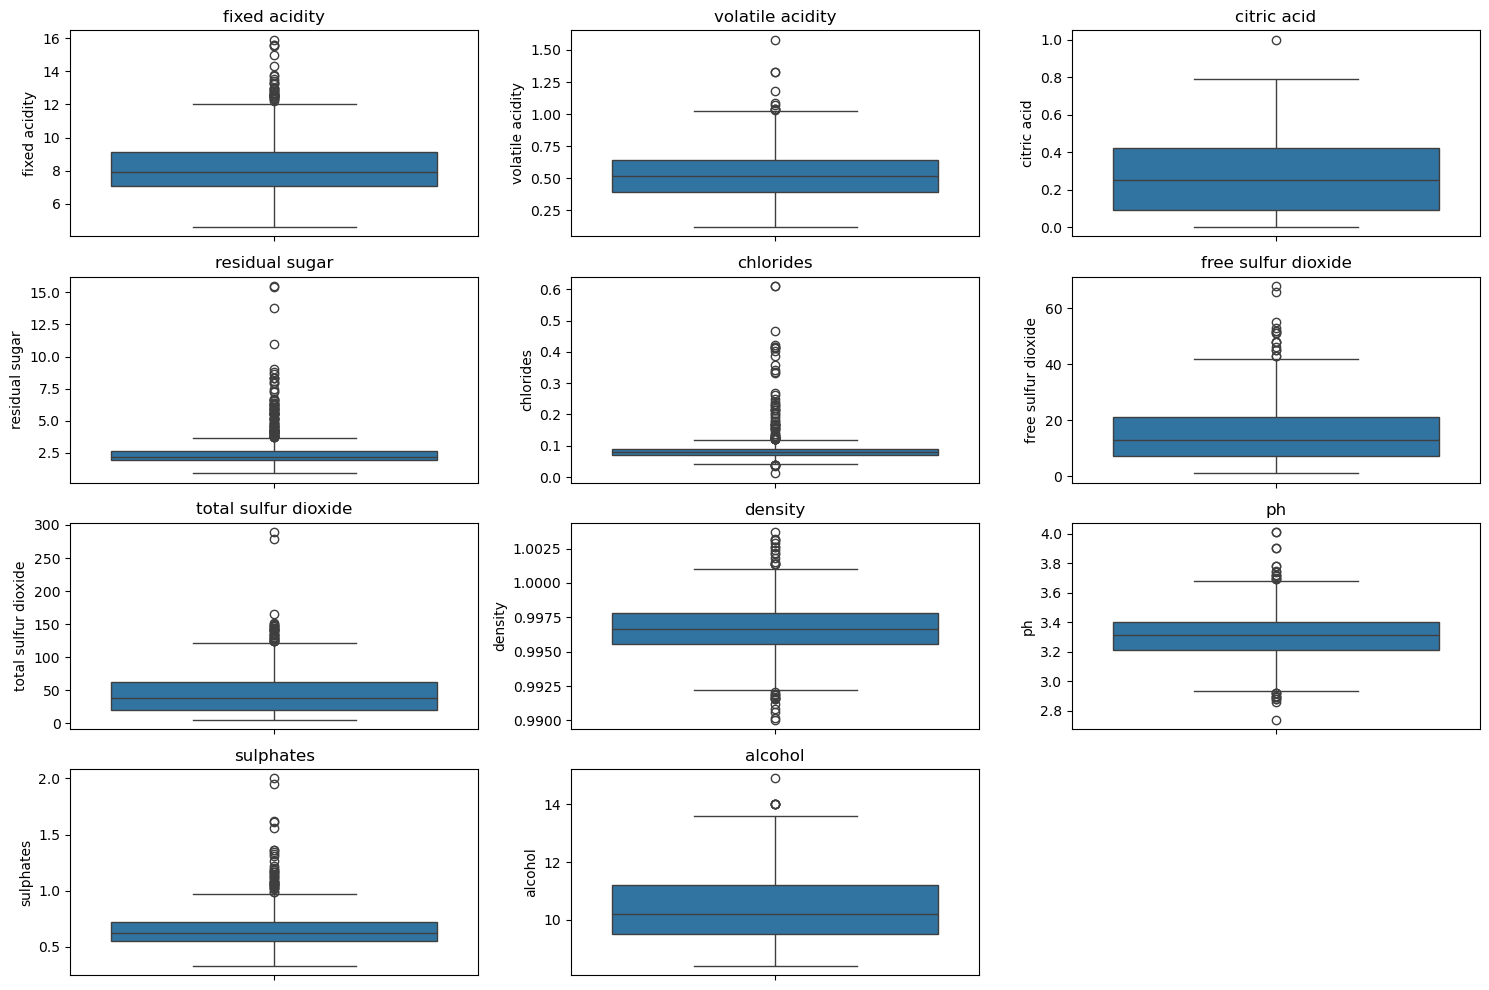

In [13]:
# Variablen, die ausgeschlossen werden sollen
exclude_columns = ['quality', 'id']

# Boxplots für alle Variablen im DataFrame erstellen, außer für 'quality' und 'id'
plt.figure(figsize=(15, 10))
filtered_columns = [col for col in wine_df.columns if col not in exclude_columns]

for i, column in enumerate(filtered_columns):
    plt.subplot(len(filtered_columns) // 3 + 1, 3, i + 1)
    sns.boxplot(data=wine_df, y=column)
    plt.title(column)
    plt.tight_layout()

plt.show()

#### *Statistisch gesehen, gibt es ziemlich viele Ausreißer. Um zu bestimmen, ob diese von der Analyse ausgeschlossen werden sollen oder nicht, gucken wir uns einmal die europäischen Richtlinien an:*

#### **EU-Richtlinien (Verordnung (EU) Nr. 1308/2013 & Verordnung (EG) Nr. 606/2009)**

**Feste Säure (fixed acidity):** \
kein Grenzwert \
*normaler Bereich: 4 bis 12 g/l*

**Flüchtige Säure (volatile acidity):** \
max. 1.2 g/l

**Citronensäure (citric acid):** \
max. 1 g/l

**Restzucker (residual sugar):** \
kein Grenzwert \
*range: 0 - 220 g/l*

**Chloride (chlorides):** \
kein Grenzwert \
*Empfehlung: unter 0.2 g/L liegen, um die Qualität des Produkts nicht zu beeinträchtigen*

**Freies Schwefeldioxid (free sulfur dioxide):** \
max. 50 mg/L \
*Weine mit höherem Restzuckergehalt (hier nicht vorhanden): bis zu 100 mg/L*

**Gesamtschwefeldioxid (total sulfur dioxide):** \
max. 200 mg/L \
*Weine mit höherem Restzuckergehalt (hier nicht vorhanden): 300 mg/L* 

**Dichte (density):** \
kein Grenzwert \
*normalerweise: 0.98 - 1.05 g/mL*

**pH (pH):** \
kein Grenzwert \
*ideale pH-Wert für mikrobiologisch stabilen Wein liegt zwischen 2.9 und 3.9*

**Sulfate (sulphates):** \
kein Grenzwert \
*typische Konzentrationen: 0.5 - 1 g/L*

**Alkohol (alcohol):** \
mind. 8.5% und max. 15% Alkoholgehalt

In [14]:
wine_df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,id
count,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000,1018.000
mean,8.289,0.534,0.269,2.524,0.087,15.649,46.326,0.997,3.312,0.657,10.452,5.641,801.762
std,1.741,0.183,0.196,1.315,0.049,10.177,33.124,0.002,0.158,0.168,1.095,0.812,466.315
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.400,3.000,0.000
25%,7.100,0.390,0.090,1.900,0.070,7.000,21.000,0.996,3.210,0.550,9.500,5.000,404.500
50%,7.900,0.520,0.250,2.200,0.079,13.000,38.000,0.997,3.310,0.620,10.200,6.000,791.500
75%,9.100,0.645,0.420,2.600,0.090,21.000,62.000,0.998,3.400,0.720,11.200,6.000,1203.750
max,15.900,1.580,1.000,15.500,0.611,68.000,289.000,1.004,4.010,2.000,14.900,8.000,1597.000


### **2.5 Ausreißer entfernen**

***Als Ausreißer gelten die Weine, bei denen mindestens eine Eigenschaft die offiziellen Grenzwerte der EU überschreitet.***

In [15]:
filtered_wine_df = wine_df[
    (wine_df['volatile acidity'] <= 1.2) &
    (wine_df['citric acid'] <= 1.0) &
    (wine_df['free sulfur dioxide'] <= 50) &
    (wine_df['total sulfur dioxide'] <= 200) &
    (wine_df['alcohol'] >= 8.5) & 
    (wine_df['alcohol'] <= 15)
]

filtered_wine_df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,id
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,8.285,0.532,0.268,2.490,0.087,15.339,45.662,0.997,3.312,0.657,10.454,5.645,800.146
std,1.738,0.177,0.195,1.209,0.048,9.492,31.245,0.002,0.157,0.168,1.091,0.804,466.362
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.500,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.210,0.550,9.500,5.000,403.500
50%,7.900,0.520,0.250,2.200,0.079,13.000,38.000,0.997,3.310,0.620,10.200,6.000,789.000
75%,9.100,0.645,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.720,11.200,6.000,1202.500
max,15.900,1.180,1.000,15.500,0.611,48.000,165.000,1.003,4.010,2.000,14.900,8.000,1597.000


*15 Weine wurden ausgeschlossen.*

In [16]:
filtered_wine_df.to_excel(r'C:\Users\britt\Desktop\Weiterbildung\Capstone\Numeric Wine DataFrame.xlsx', index=False)

## 3. Explorative Analyse und Visualisierungen

### **3.1 Deskriptive Statistiken**

In [17]:
filtered_wine_df.describe().round(3)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,id
count,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000,1003.000
mean,8.285,0.532,0.268,2.490,0.087,15.339,45.662,0.997,3.312,0.657,10.454,5.645,800.146
std,1.738,0.177,0.195,1.209,0.048,9.492,31.245,0.002,0.157,0.168,1.091,0.804,466.362
min,4.600,0.120,0.000,0.900,0.012,1.000,6.000,0.990,2.740,0.330,8.500,3.000,0.000
25%,7.100,0.392,0.090,1.900,0.070,7.000,21.000,0.996,3.210,0.550,9.500,5.000,403.500
50%,7.900,0.520,0.250,2.200,0.079,13.000,38.000,0.997,3.310,0.620,10.200,6.000,789.000
75%,9.100,0.645,0.420,2.600,0.090,21.000,61.000,0.998,3.400,0.720,11.200,6.000,1202.500
max,15.900,1.180,1.000,15.500,0.611,48.000,165.000,1.003,4.010,2.000,14.900,8.000,1597.000


#### **Verteilung der Qualitätsbewertungen**

In [18]:
# Deskriptive Statistiken für die Spalte 'Quality'
filtered_wine_df['quality'].describe()

count    1003.000000
mean        5.645065
std         0.803959
min         3.000000
25%         5.000000
50%         6.000000
75%         6.000000
max         8.000000
Name: quality, dtype: float64

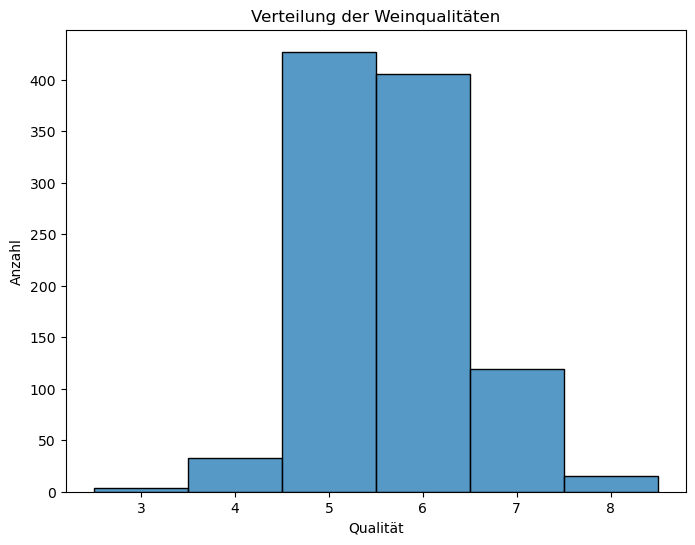

quality
5    427
6    405
7    119
4     33
8     15
3      4
Name: count, dtype: int64

In [19]:
# Histogramm erstellen
plt.figure(figsize=(8, 6))
bins = [i - 0.5 for i in range(3, 9 + 1)] 
sns.histplot(filtered_wine_df['quality'], bins=bins)
plt.title('Verteilung der Weinqualitäten')
plt.xlabel('Qualität')
plt.ylabel('Anzahl')
plt.show()

# Spezifische Verteilung der Qualitätsbewertungen anzeigen
filtered_wine_df['quality'].value_counts()

*Die durchschnittliche Qualitätsbewertung liegt bei 5.64. Es gbit relativ wenige niedrige Bewertungen (3 und 4), aber auch nicht viele sehr hohe (8 und gar keine 9). Die Qualität wird zum Großteil mit einer 5 oder 6 bewertet. Dies liegt wahrscheinlich daran, dass bei einer subjektiven Bewertung, Menschen dazu tendieren, eher durchschnittlich zu bewerten.*

**Somit scheint ein systematisches Bewertungsmuster vorzuliegen und der Abstand zwischen den einzelen Quality-Rankings nicht gleich 1 zu betragen.** 

#### Wie geht man damit um? 
**Qualitätsbewertungen in drei Gruppen einteilen, um das Clustering zu umgehen und eine klarere Analyse zu ermöglichen!**

#### **Binning nach Quantilen**: 
**Niedrig** (unteres Quantil): Niedrigste 25% der Bewertungen (**3-5**) \
**Mittel** (mittleres Quantil): Mittlere 50% der Bewertungen (**6**) \
**Hoch** (oberes Quantil): Höchste 25% der Bewertungen (**7-8**)

In [20]:
# Erstellen des DataFrames und Einteilung in drei Gruppen basierend auf den Quantilen
grouped_df = pd.DataFrame({
    'quality_group': pd.qcut(filtered_wine_df['quality'], 3, labels=['Low', 'Medium', 'High'])
})

# Häufigkeiten der neuen Gruppen anzeigen
print(grouped_df['quality_group'].value_counts())

quality_group
Low       464
Medium    405
High      134
Name: count, dtype: int64


### **3.2 Überblick: Beziehung zwischen verschiedenen Eigenschaften und Weinqualität:**

*Für eine genauere Analyse die chemischen Eigenschaften auch in 4 Gruppen einteilen (4 Quantile):*

**Niedrig** (Low): 1. Quantil (**0-25%**) \
**Mittel Niedrig** (Medium-Low): 2. Quantil (**25%-50%**)  \
**Mittel Hoch** (Medium-High): 3. Quantil (**50%-75%**)  \
**Hoch** (Hoch): 4. Quantil (**75%-100%**)

In [21]:
# Spalten, die standardisiert werden sollen
attributes = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 
                               'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 
                               'density', 'ph', 'sulphates', 'alcohol']

# Aufteilen in Quantile für jedes Attribut
for attribute in attributes:
    grouped_df[f'{attribute}_group'] = pd.qcut(filtered_wine_df[attribute], q=4, labels=['Low', 'Medium-Low', 'Medium-High', 'High'])

grouped_df = pd.merge(grouped_df, filtered_wine_df[['id']], left_index=True, right_index=True)

In [22]:
grouped_df.head(10)

,quality_group,fixed acidity_group,volatile acidity_group,citric acid_group,residual sugar_group,chlorides_group,free sulfur dioxide_group,total sulfur dioxide_group,density_group,ph_group,sulphates_group,alcohol_group,id
0,Low,Medium-Low,High,Low,Low,Medium-Low,Medium-Low,Medium-Low,Medium-High,High,Medium-Low,Low,0
1,Low,Medium-Low,High,Low,Medium-High,High,High,High,Medium-High,Low,Medium-High,Medium-Low,1
2,Low,Medium-Low,High,Low,Medium-High,High,Medium-High,Medium-High,Medium-High,Medium-Low,Medium-High,Medium-Low,2
3,Medium,High,Low,High,Low,Medium-Low,Medium-High,Medium-High,High,Low,Medium-Low,Medium-Low,3
5,Low,Medium-Low,High,Low,Low,Medium-Low,Medium-Low,Medium-High,Medium-High,High,Medium-Low,Low,5
6,Low,Medium-Low,Medium-High,Low,Low,Low,Medium-High,Medium-High,Medium-Low,Medium-Low,Low,Low,6
7,High,Medium-Low,High,Low,Low,Low,Medium-High,Low,Low,Medium-High,Low,Medium-Low,7
8,High,Medium-Low,Medium-High,Low,Medium-Low,Medium-Low,Medium-Low,Low,Medium-High,Medium-High,Medium-Low,Low,8
9,Low,Low,Medium-High,Low,Low,High,Medium-High,High,Medium-Low,Medium-Low,Low,Low,10
10,Low,Low,Medium-High,Low,Low,Medium-High,Medium-High,Medium-High,Low,High,Low,Medium-Low,12


### Gruppierung der chemischen Attribute

#### **Feste Säure (fixed acidity) in g/l:** 
**Niedrig** (Low): **4.6 - 7.1**  \
**Mittelniedrig** (Medium-Low): **7.1 - 7.9**  \
**Mittelhoch** (Medium-High): **7.9 - 9.1**  \
**Hoch** (High): **9.1 - 15.9**

#### **Flüchtige Säure (volatile acidity) in g/l:** 
**Niedrig** (Low): **0.120 - 0.392**  \
**Mittelniedrig** (Medium-Low): **0.392 - 0.520**  \
**Mittelhoch** (Medium-High): **0.520 - 0.645**  \
**Hoch** (High): **0.645 - 1.180**

#### **Citronensäure (citric acid) in g/l:** 
**Niedrig** (Low): **0.00 - 0.09**  \
**Mittelniedrig** (Medium-Low): **0.09 - 0.25**  \
**Mittelhoch** (Medium-High): **0.25 - 0.42**  \
**Hoch** (High): **0.42 - 1.00**

#### **Restzucker (residual sugar) in g/l:** 
**Niedrig** (Low): **0.9 - 1.9**  \
**Mittelniedrig** (Medium-Low): **1.9 - 2.2**  \
**Mittelhoch** (Medium-High): **2.2 - 2.6**  \
**Hoch** (High): **2.6 - 15.5**

#### **Chloride (chlorides) in g/l:** 
**Niedrig** (Low): **0.012 - 0.070**  \
**Mittelniedrig** (Medium-Low): **0.070 - 0.079**  \
**Mittelhoch** (Medium-High): **0.079 - 0.090**  \
**Hoch** (High): **0.090 - 0.611**

#### **Freies Schwefeldioxid (free sulfur dioxide) in mg/l:** 
**Niedrig** (Low): **1 - 7**  \
**Mittelniedrig** (Medium-Low): **7 - 13**  \
**Mittelhoch** (Medium-High): **13 - 21**  \
**Hoch** (High): **21 - 48**

#### **Gesamtschwefeldioxid (total sulfur dioxide) in mg/l:** 
**Niedrig** (Low): **6 - 21**  \
**Mittelniedrig** (Medium-Low): **21 - 38**  \
**Mittelhoch** (Medium-High): **38 - 61**  \
**Hoch** (High): **61 - 165**

#### **Dichte (density) in g/ml:** 
**Niedrig** (Low): **0.990 - 0.996** \
**Mittelniedrig** (Medium-Low): **0.996 - 0.997**  \
**Mittelhoch** (Medium-High): **0.997 - 0.998**  \
**Hoch** (High): **0.998 - 1.003**

#### **pH (pH):** 
**Niedrig** (Low): **2.74 - 3.21**  \
**Mittelniedrig** (Medium-Low): **3.21 - 3.31**  \
**Mittelhoch** (Medium-High): **3.31 - 3.40**  \
**Hoch** (High): **3.40 - 4.01**

#### **Sulfate (sulphates) in mg/l:** 
**Niedrig** (Low): **0.33 - 0.55** \
**Mittelniedrig** (Medium-Low): **0.55 - 0.62**  \
**Mittelhoch** (Medium-High): **0.62 - 0.72**  \
**Hoch** (High): **0.72 - 2**

#### **Alkohol (alcohol) in %:** 
**Niedrig** (Low): **8.5 - 9.5**  \
**Mittelniedrig** (Medium-Low): **9.5 - 10.2**  \
**Mittelhoch** (Medium-High): **10.2 - 11.2**  \
**Hoch** (High): **11.2 - 14.9**

In [23]:
grouped_df.to_excel(r'C:\Users\britt\Desktop\Weiterbildung\Capstone\Ordinal Wine DataFrame.xlsx', index=False)

### **3.3 Überblick: Verteilung der Attribute in Bezug auf Qualitätsbewertungen**

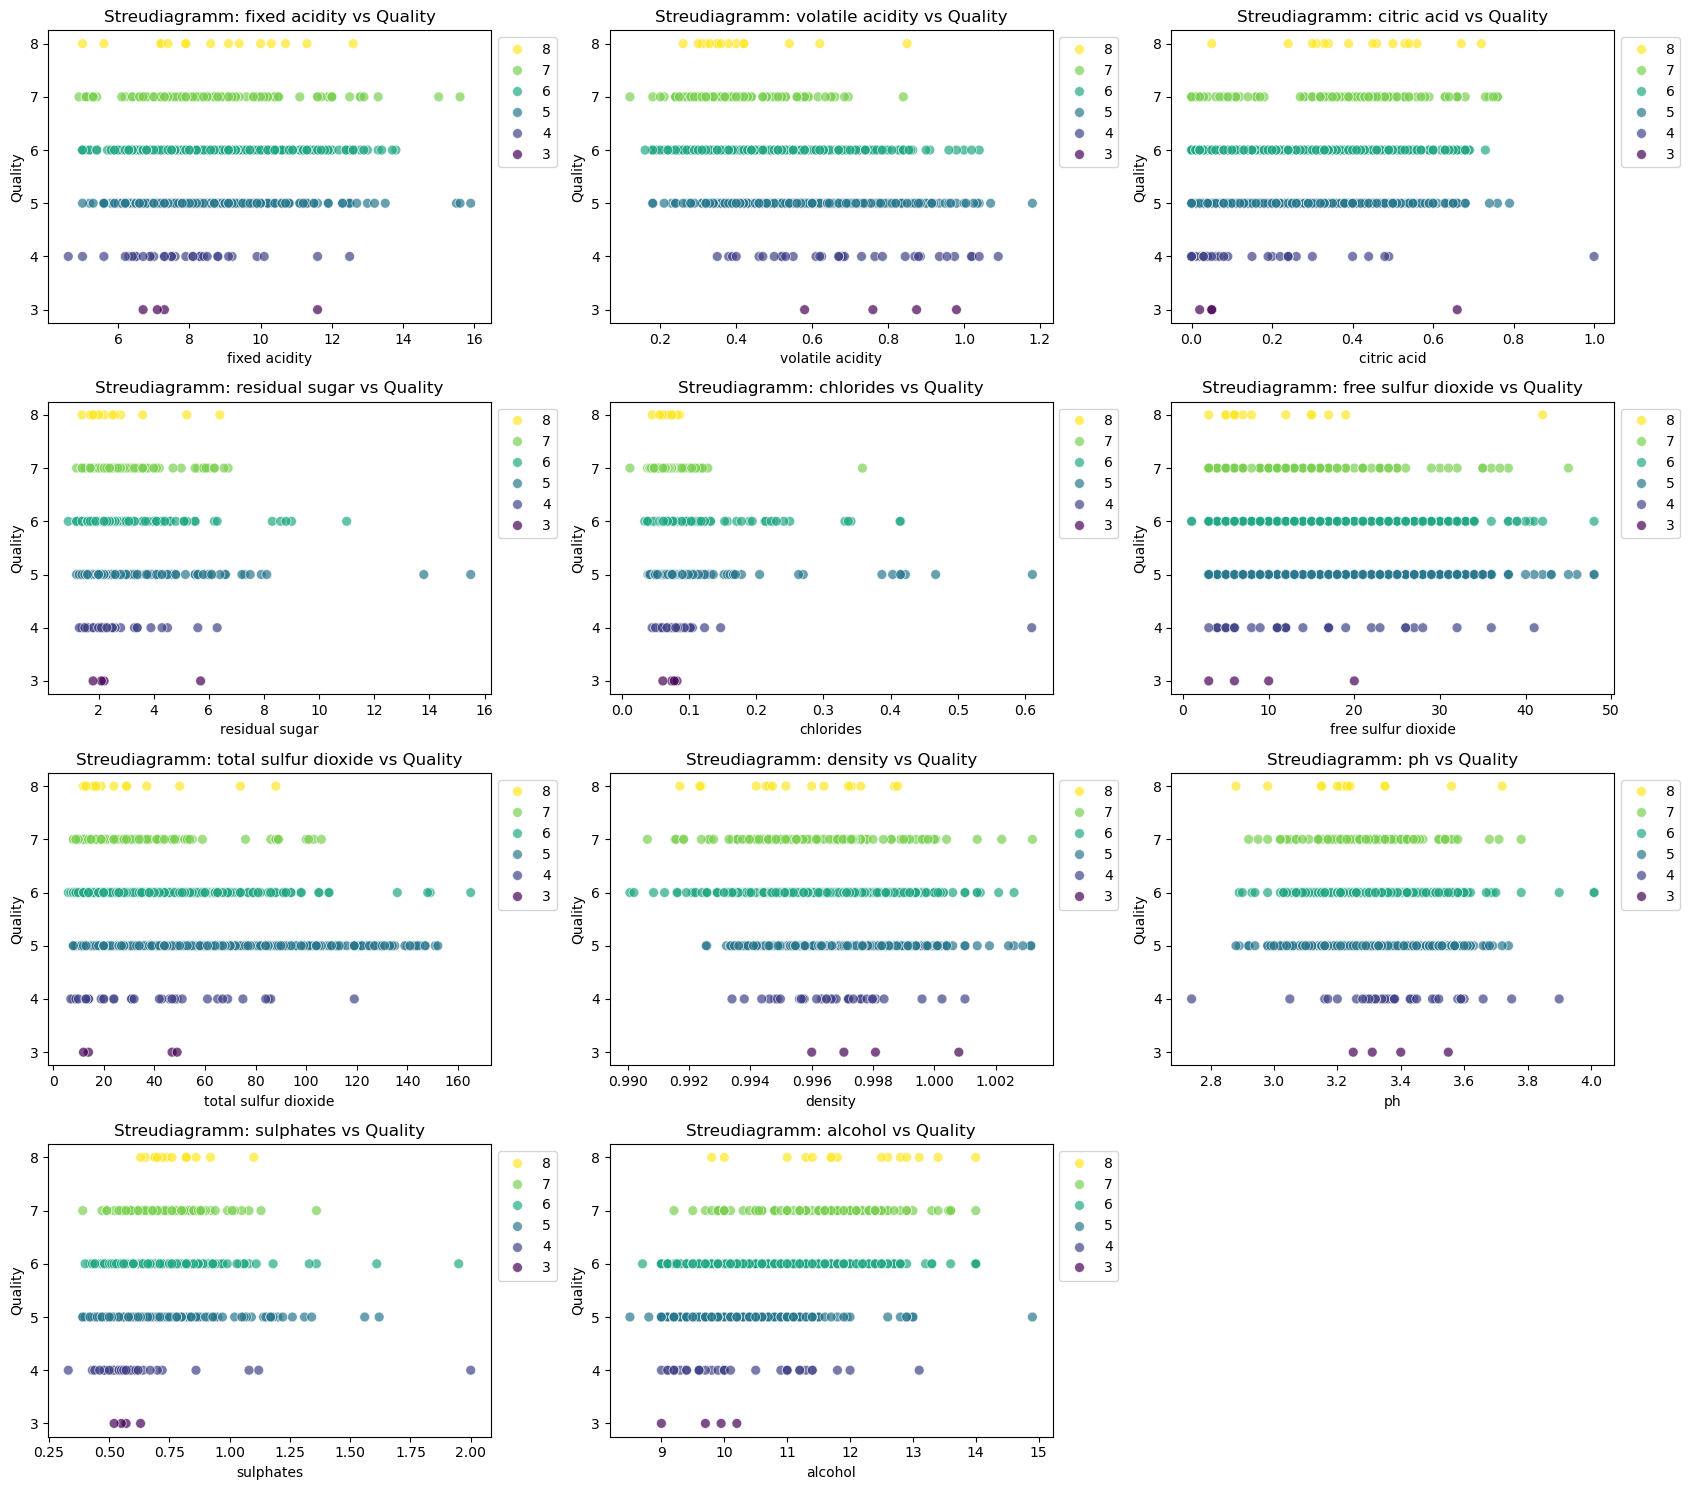

In [24]:
# Durch chemische Eigenschaften loopen und Scatterplots erstellen
fig, axes = plt.subplots(nrows=4, ncols=3, figsize=(20, 15))
axes = axes.flatten()

for ax, attr in zip(axes, attributes):
    scatter = sns.scatterplot(data=filtered_wine_df, x=attr, y='quality', ax=ax, hue='quality', palette="viridis", s=50, alpha=0.7)
    ax.set_title(f'Streudiagramm: {attr} vs Quality')
    ax.set_xlabel(attr)
    ax.set_ylabel('Quality')

    # Legende holen und sortieren
    handles, labels = ax.get_legend_handles_labels()
    sorted_handles_labels = sorted(zip(handles, labels), key=lambda x: float(x[1]), reverse=True)
    sorted_handles, sorted_labels = zip(*sorted_handles_labels)
    
    # Sortierte Legende außerhalb des Plots anzeigen
    ax.legend(sorted_handles, sorted_labels, loc='upper left', bbox_to_anchor=(1, 1))

# Leeren Plot entfernen
for i in range(len(attributes), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout(rect=[0, 0, 0.85, 1])  # Platz für die Legenden rechts schaffen
plt.show()

#### Erkenntnisse:

- die Werte der Attribute sind nicht linear verteilt
- wenn man vor allem auf die gelben und hellgrünen Punkte achtet kann man bei manchen chemischen Attributen aber Trends wahrnehmen
- **bessere Qualität wenn niedriger?**: Flüchtige Säure, Restzucker, Chlorid, Gesamtschwefeldioxid 
- **bessere Qualität wenn höher?**: Alkohol 

### **3.4 Prüfen ob die Attribute normalverteilt sind**

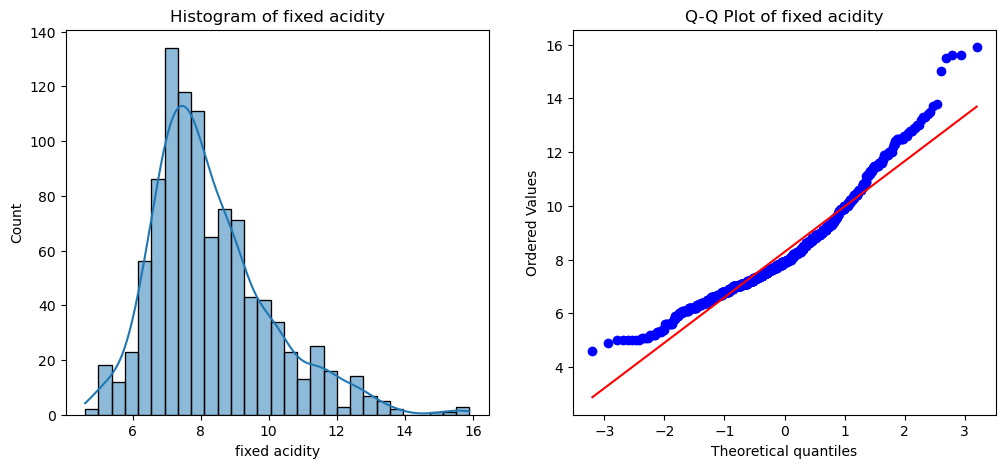

Shapiro-Wilk Test for fixed acidity: Statistics=0.9406341314315796, p=1.3616179996674468e-19
fixed acidity does not look normally distributed.



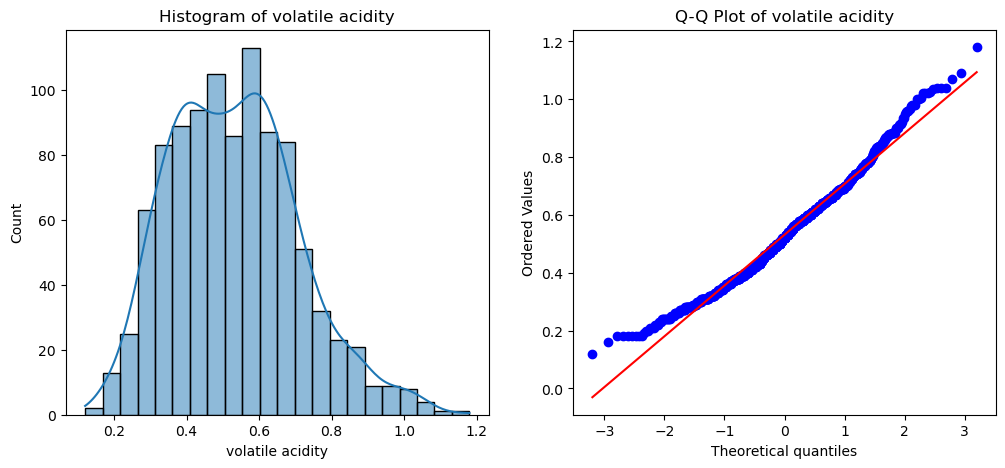

Shapiro-Wilk Test for volatile acidity: Statistics=0.9827404022216797, p=1.6121687318459976e-09
volatile acidity does not look normally distributed.



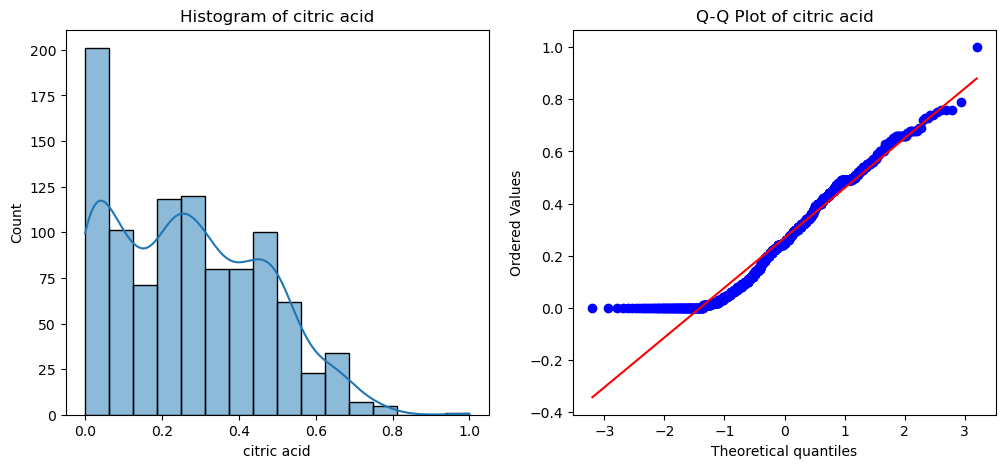

Shapiro-Wilk Test for citric acid: Statistics=0.954804539680481, p=5.0370276663799963e-17
citric acid does not look normally distributed.



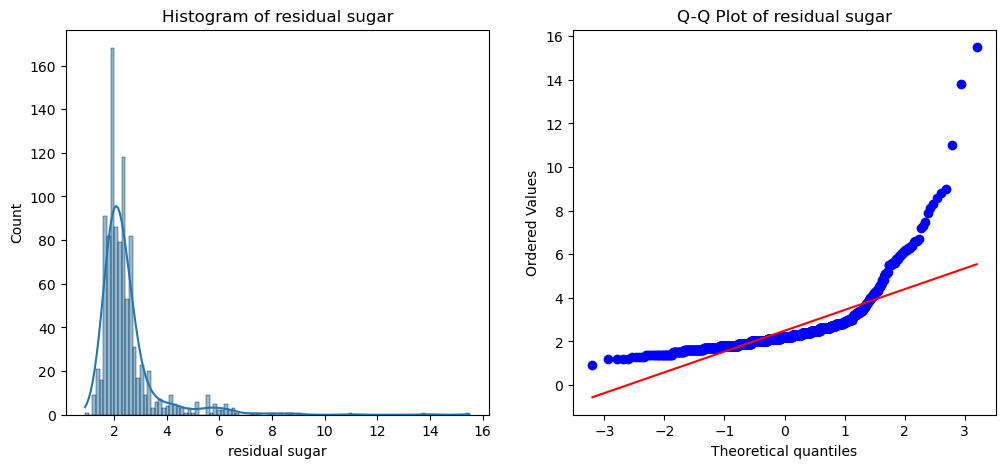

Shapiro-Wilk Test for residual sugar: Statistics=0.6229352951049805, p=3.548087711670437e-42
residual sugar does not look normally distributed.



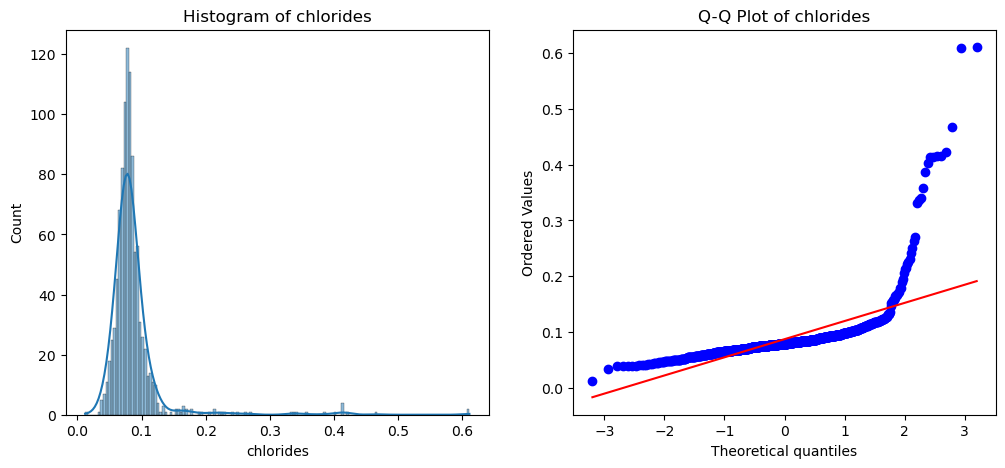

Shapiro-Wilk Test for chlorides: Statistics=0.45866626501083374, p=0.0
chlorides does not look normally distributed.



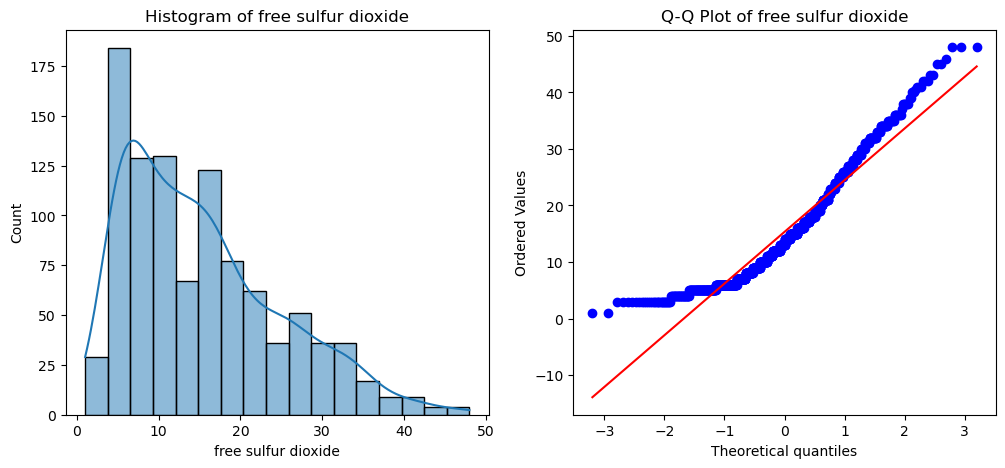

Shapiro-Wilk Test for free sulfur dioxide: Statistics=0.9238606095314026, p=4.1678439777086647e-22
free sulfur dioxide does not look normally distributed.



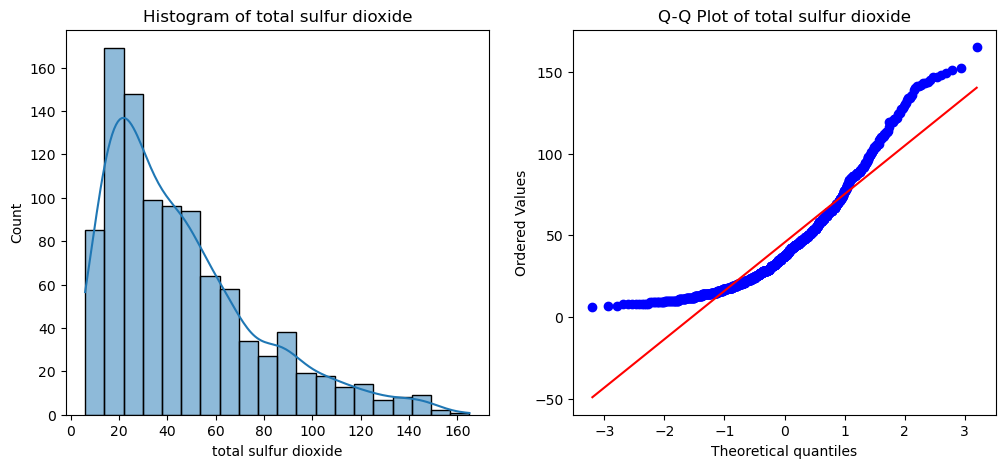

Shapiro-Wilk Test for total sulfur dioxide: Statistics=0.8912048935890198, p=5.357865614765754e-26
total sulfur dioxide does not look normally distributed.



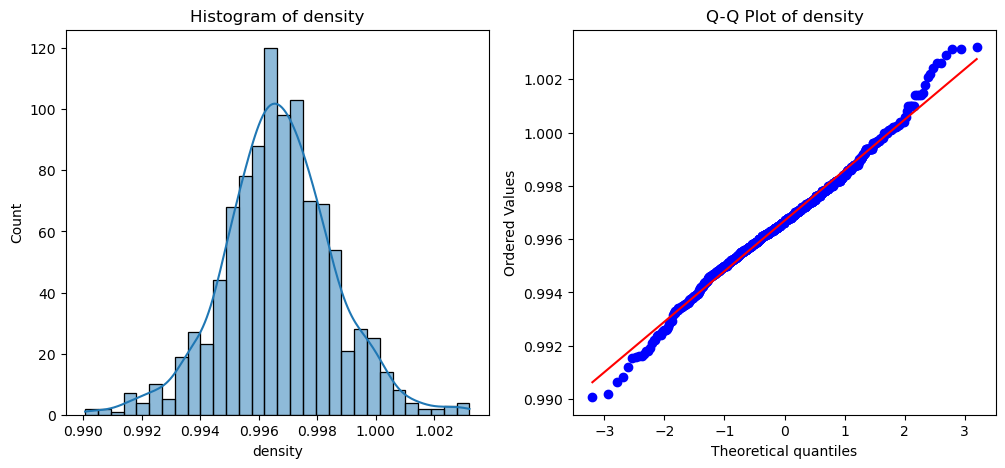

Shapiro-Wilk Test for density: Statistics=0.9915270209312439, p=1.608079946890939e-05
density does not look normally distributed.



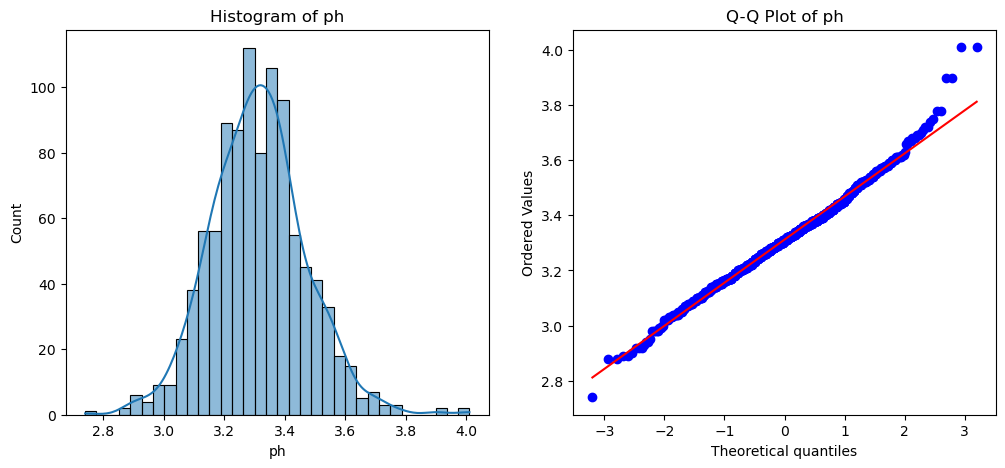

Shapiro-Wilk Test for ph: Statistics=0.9906482100486755, p=5.362702268030262e-06
ph does not look normally distributed.



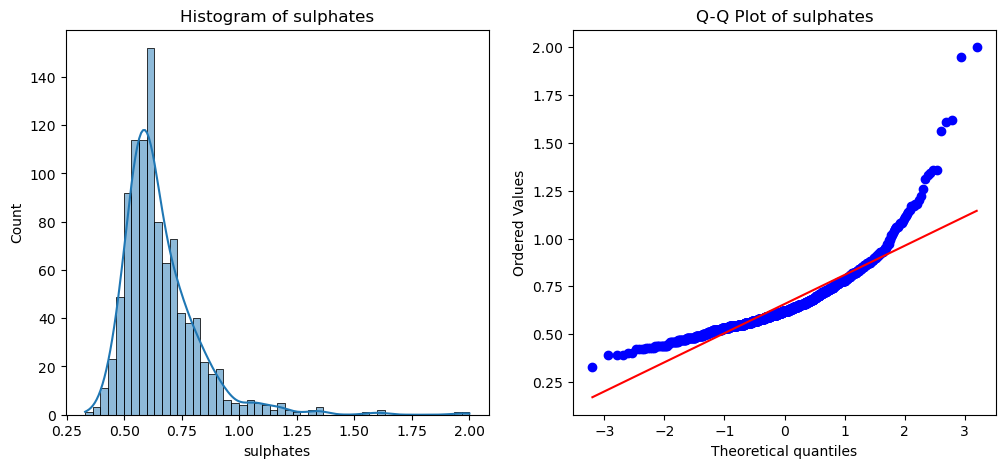

Shapiro-Wilk Test for sulphates: Statistics=0.8252515196800232, p=1.1036314440802476e-31
sulphates does not look normally distributed.



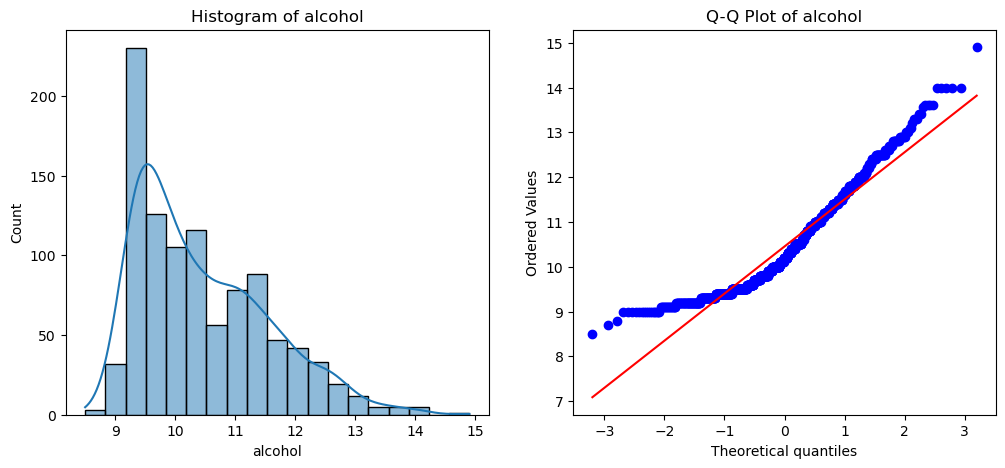

Shapiro-Wilk Test for alcohol: Statistics=0.9257763624191284, p=7.6714256738009315e-22
alcohol does not look normally distributed.



In [25]:
# Normale Verteilung prüfen
for att in attributes:
    plt.figure(figsize=(12, 5))
    
    # Histogram
    plt.subplot(1, 2, 1)
    sns.histplot(filtered_wine_df[att], kde=True)
    plt.title(f'Histogram of {att}')
    
    # Q-Q Plot
    plt.subplot(1, 2, 2)
    stats.probplot(filtered_wine_df[att], dist="norm", plot=plt)
    plt.title(f'Q-Q Plot of {att}')
    
    plt.show()
    
    # Shapiro-Wilk Test
    stat, p = stats.shapiro(filtered_wine_df[att])
    print(f'Shapiro-Wilk Test for {att}: Statistics={stat}, p={p}')
    if p > 0.05:
        print(f'{att} looks normally distributed.\n')
    else:
        print(f'{att} does not look normally distributed.\n')

***Bei keinen der chemischen Attributen liegt eine normale Verteilung vor!***

### **3.5 Überblick: Korrelationen zwischen allen Variablen:**

### **3.5.1 Log-Transformation**

Da die chemischen Attribute nicht linear und normal verteilt sind, verwenden wir eine Log-Transformation, um die Verteilung der Variable zu verbessern und alles zu stabilisieren.

In [26]:
log_df = filtered_wine_df.copy()

# Identifiziere alle numerischen Spalten, außer 'id' und 'quality'
columns_to_transform = [col for col in log_df.columns if col not in ['id', 'quality']]

# Wende Log-Transformation auf die ausgewählten Spalten an
for column in columns_to_transform:
    log_df[column] = np.log1p(log_df[column])

print(log_df.head())


# Das Gleiche für den DataFrame inklusive Ausreißer
log_outlier_df = wine_df.copy()
columns_to_transform = [col for col in log_outlier_df.columns if col not in ['id', 'quality']]
for column in columns_to_transform:
    log_outlier_df[column] = np.log1p(log_outlier_df[column])

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0       2.128232          0.530628     0.000000        1.064711   0.073250   
1       2.174752          0.631272     0.000000        1.280934   0.093490   
2       2.174752          0.565314     0.039221        1.193922   0.088011   
3       2.501436          0.246860     0.444686        1.064711   0.072321   
5       2.128232          0.506818     0.000000        1.029619   0.072321   

   free sulfur dioxide  total sulfur dioxide   density        ph  sulphates  \
0             2.484907              3.555348  0.692047  1.506297   0.444686   
1             3.258097              4.219508  0.691546  1.435085   0.518794   
2             2.772589              4.007333  0.691646  1.449269   0.500775   
3             2.890372              4.110874  0.692147  1.425515   0.457425   
5             2.639057              3.713572  0.692047  1.506297   0.444686   

    alcohol  quality  id  
0  2.341806        5   0  
1 

### **3.5.2 Standardisierung**

##### **Grund:** 
Die Variablen im Datensatz haben unterschiedliche Größenordnungen (z.B. g/L, mg/L, Volumenanteil). 
Um zu verhindern, dass Variablen wie 'Freies Schwefeldioxid' (free sulfur dioxide), 'Gesamtschwefeldioxid' (total sulfur dioxide) oder 'Alkohol' (alcohol) die Modelle dominieren und die Wichtigkeit anderer Variablen verzerren, werden wir die Daten standardisieren. 
Die Zielvariable 'Quality' sowie die 'ID'-Spalte sollen natürlich nicht standardisiert werden.

In [27]:
# Mittelwerte und Standardabweichungen für die Spalten, die standardisiert werden sollen zur Berechnung der Z-Scores
means = log_df[attributes].mean()
stds = log_df[attributes].std()

means_outlier =  log_outlier_df[attributes].mean()
stds_outlier =  log_outlier_df[attributes].std()

# Erstellen der neuen DataFrames durch Kopieren der Original-DataFrames
z_log_df = filtered_wine_df.copy()
z_log_outlier_df = wine_df.copy()

# Standardisieren der ausgewählten Spalten
z_log_df[attributes] = (log_df[attributes] - means) / stds

 # Für einen späteren Vergleich mit Ausreißern
z_log_outlier_df[attributes] = (log_outlier_df[attributes] - means_outlier) / stds_outlier     

# Aktualisierten DataFrame anzeigen
print(z_log_df.head(5))

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0      -0.470523          0.971625    -1.481792       -0.587640  -0.230899   
1      -0.209636          1.853922    -1.481792        0.274311   0.280483   
2      -0.209636          1.275698    -1.224681       -0.072551   0.142038   
3       1.622430         -1.516043     1.433340       -0.587640  -0.254392   
5      -0.470523          0.762888    -1.481792       -0.727527  -0.254392   

   free sulfur dioxide  total sulfur dioxide   density        ph  sulphates  \
0            -0.224508             -0.103525  0.582657  1.256399  -0.606022   
1             1.055498              0.883111  0.056292 -0.707040   0.194784   
2             0.251746              0.567917  0.161586 -0.315948   0.000077   
3             0.446734              0.721731  0.687898 -0.970884  -0.468365   
5             0.030687              0.131523  0.582657  1.256399  -0.606022   

    alcohol  quality  id  
0 -0.999062        5   0  
1 

In [28]:
z_log_df.to_excel(r'C:\Users\britt\Desktop\Weiterbildung\Capstone\z & log DataFrame.xlsx', index=False)
z_log_outlier_df.to_excel(r'C:\Users\britt\Desktop\Weiterbildung\Capstone\z & log Outlier DataFrame.xlsx', index=False)

### **3.5.3 Korrelationsmatrix**

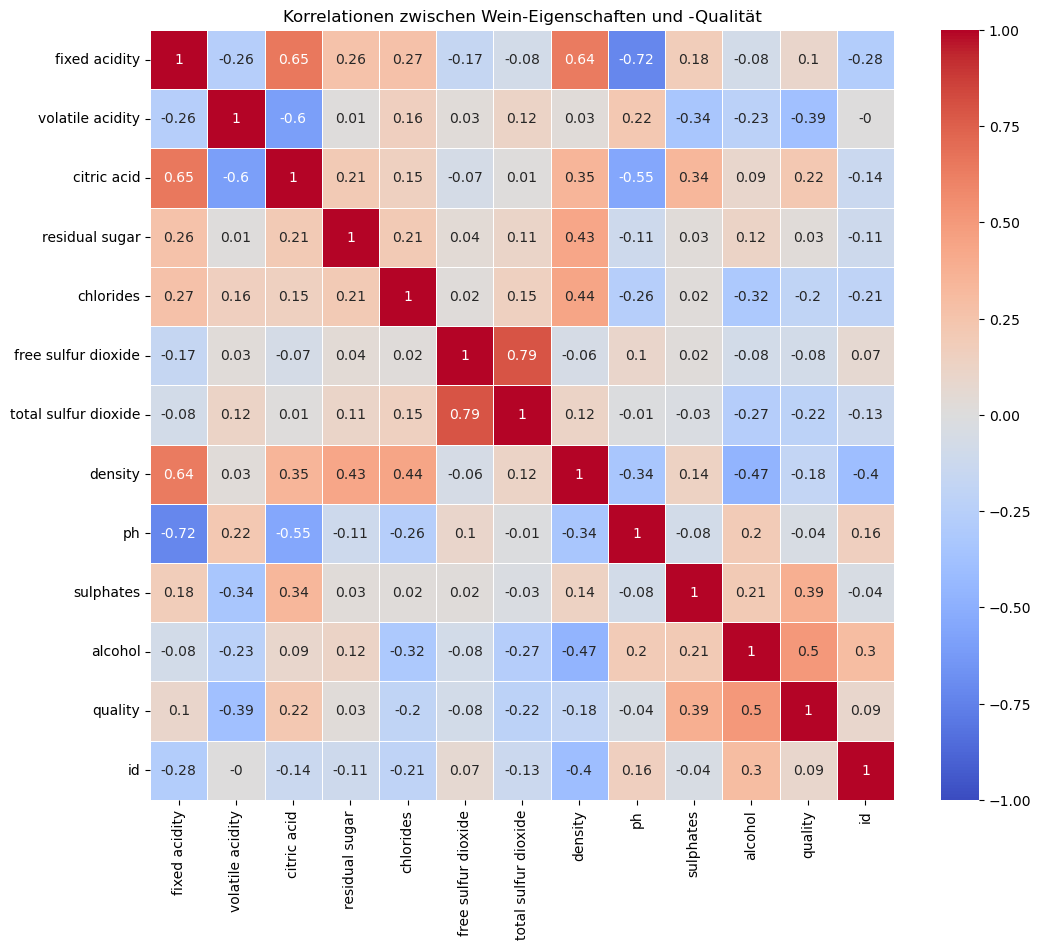

In [29]:
# Korrelationsmatrix für den DataFrame erstellen
correlation_matrix = z_log_df.corr(method='spearman')

# Korrelationsmatrix als Heatmap visualisieren
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix.round(2), annot=True, cmap='coolwarm', vmin=-1, vmax=1, linewidths=.5)
plt.title('Korrelationen zwischen Wein-Eigenschaften und -Qualität')
plt.show()

**Potenziell significante Faktoren, die die Weinqualität beeinflussen:**

**starke Korrelation:** 
- Alkohol: 0.5  

**moderate Korrelation:** 
- Flüchtige Säure: -0.39
- Sulfate: 0.39 


**schwache Korrelation:** 
- Gesamtschwefeldioxid: -0.22
- Chloride: -0.2
- Dichte: -0.18
- Feste Säure: 0.1
- Citronensäure: 0.22

**Info:** \
*positive Korrelation*: Je höher das chemische Attribut, desto höher tendiert die Qualitätsbewertung auszufallen \
*negative Korrelation*: Je höher das chemische Attribut, desto niedriger tendiert die Qualtätsbewertung auszufallen

**Potenzielle Interaktionen von chemischen Eigenschaften, die die Weinqualität beeinflussen:**

**starke Korrelation:**
- Gesamtschwefeldioxid & Freies Schwefeldioxid: 0.79
- Citronensäure & Feste Säure: 0.65
- Dichte & Feste Säure: 0.64
- Citronensäure & Flüchtige Säure: -0.65  !!!
- pH & Citronensäure: -0.55
- pH & Feste Säure: -0.72  

**moderate Korrelation:** 
- Dichte & Chloride: 0.44
- Dichte & Restzucker: 0.43
- Dichte & Citronensäure: 0.35
- Sulfate & Citronensäure: 0.34    !!!
- Alkohol & Chloride: -0.32    !!!
- pH & Dichte: -0.34
- Sulfate & Flüchtige Säure: -0.34    !!! !!!
- Alkohol & Dichte: -0.47    !!!

***Besonders interessant sind die starken/moderaten Korrelationen in denen mindestens eins der chemischen Attribute auch stark oder moderat mit Qualität korreliert! Also:*** \
*Alkohol, Flüchtige Säure, und Sulfate (mit '!!!' gekennzeichnet)*

#### **In dieser Analyse werde ich mich auf die starken Korrelationen + die moderaten Korrelationen beschränken bei denen mindestens eins der chemischen Attribute auch stark oder moderat mit Qualität korreliert (bei den Interaktionen)**

### **3.6 Korrelationen zwischen einzelnen Attributen und hohen Qualitätsbewertungen:**

In [30]:
# Funktion zur Durchführung des Chi-Quadrat-Tests und zur Interpretation der Ergebnisse
def chi2_test(crosstab):
    chi2_stat, p_value, _, _ = chi2_contingency(crosstab)
    alpha = 0.05
    is_significant = p_value < alpha
    return chi2_stat, p_value, is_significant

In [31]:
def print_chi2_results(name, chi2_stat, p_value, is_significant):
    significance = "signifikant" if is_significant else "nicht signifikant"
    print(f"Chi-Quadrat-Test für {name}:")
    print(f"Chi2-Statistik: {chi2_stat:.4f}")
    print(f"P-Wert: {p_value:.4f}")
    print(f"Ergebnis ist {significance}.")
    print("\n" + "-"*50 + "\n")

**Alkohol (stark)**

In [32]:
crosstab_alcohol = pd.crosstab(grouped_df['alcohol_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_alcohol = crosstab_alcohol.round(2)
chi2_alcohol, p_alcohol, sig_alcohol = chi2_test(crosstab_alcohol)

print(crosstab_alcohol)
print_chi2_results('Alcohol vs Quality', chi2_alcohol, p_alcohol, sig_alcohol)

quality_group    Low  Medium   High
alcohol_group                      
Low            73.58   25.66   0.75
Medium-Low     57.81   37.11   5.08
Medium-High    36.00   50.00  14.00
High           13.36   50.43  36.21
Chi-Quadrat-Test für Alcohol vs Quality:
Chi2-Statistik: 109.3712
P-Wert: 0.0000
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Alkohol und Qualitätsbewertungen
- Je höher der Alkoholgehalt, desto höher auch die Qualitätsbewertungen \
*Wenn **hoher** Alkoholgehalt (11.2% - 14.9%):*
- 50.43% mittel und 36.21% hohe Bewertungen (86.64%)
- nur 13.36% niedrige Bewertungen

**Flüchtige Säure (moderat)**

In [33]:
crosstab_volatile_acidity = pd.crosstab(grouped_df['volatile acidity_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_volatile_acidity = crosstab_volatile_acidity.round(2)
chi2_volatile_acidity, p_volatile_acidity, sig_volatile_acidity = chi2_test(crosstab_volatile_acidity)

print(crosstab_volatile_acidity)
print_chi2_results('Volatile Acidity vs Quality', chi2_volatile_acidity, p_volatile_acidity, sig_volatile_acidity)

quality_group             Low  Medium   High
volatile acidity_group                      
Low                     23.90   45.42  30.68
Medium-Low              41.25   45.53  13.23
Medium-High             53.57   40.08   6.35
High                    67.08   30.04   2.88
Chi-Quadrat-Test für Volatile Acidity vs Quality:
Chi2-Statistik: 60.2765
P-Wert: 0.0000
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen flüchtiger Säure und Qualitätsbewertungen
- Je niedriger flüchtige Säure, desto höher die Qualitätsbewertungen \
*Wenn **niedrige** flüchtige Säure (0.120g/l - 0.392g/l):*
- 45.42% mittel und 30.68% hohe Bewertungen (76.10%)
- nur 23.90% niedrige Bewertungen

**Sulfate (moderat)**

In [34]:
crosstab_sulphates = pd.crosstab(grouped_df['sulphates_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_sulphates = crosstab_sulphates.round(2)
chi2_sulphates, p_sulphates, sig_sulphates = chi2_test(crosstab_sulphates)

print(crosstab_sulphates)
print_chi2_results('Sulphates vs Quality', chi2_sulphates, p_sulphates, sig_sulphates)

quality_group      Low  Medium   High
sulphates_group                      
Low              71.94   24.90   3.16
Medium-Low       52.16   43.17   4.68
Medium-High      33.48   50.66  15.86
High             24.90   43.67  31.43
Chi-Quadrat-Test für Sulphates vs Quality:
Chi2-Statistik: 74.8320
P-Wert: 0.0000
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Sulfaten und Qualitätsbewertungen
- Je höher Sulfate, desto höher auch die Qualitätsbewertungen \
*Wenn **hohe** Sulfate (0.72mg/l - 2mg/l):*
- 43.67% mittel und 31.43% hohe Bewertungen (75.10%)
- nur 24.90% niedrige Bewertungen

**Gesamtschwefeldioxid (schwach)**

In [35]:
crosstab_total_sulfur_dioxide = pd.crosstab(grouped_df['total sulfur dioxide_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_total_sulfur_dioxide = crosstab_total_sulfur_dioxide.round(2)
chi2_total_sulfur_dioxide, p_total_sulfur_dioxide, sig_total_sulfur_dioxide = chi2_test(crosstab_total_sulfur_dioxide)

print(crosstab_total_sulfur_dioxide)
print_chi2_results('Total Sulfur Dioxide vs Quality', chi2_total_sulfur_dioxide, p_total_sulfur_dioxide, sig_total_sulfur_dioxide)

quality_group                 Low  Medium   High
total sulfur dioxide_group                      
Low                         38.19   42.91  18.90
Medium-Low                  36.64   44.27  19.08
Medium-High                 43.10   46.86  10.04
High                        67.74   27.42   4.84
Chi-Quadrat-Test für Total Sulfur Dioxide vs Quality:
Chi2-Statistik: 30.4034
P-Wert: 0.0000
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Gesamtschwefeldioxid und Qualitätsbewertungen
- Je niedriger Gesamtschwefeldioxid, desto höher die Qualitätsbewertungen \
*Wenn **mittelniedriges** Gesamtschwefeldioxid (21mg/l - 38mg/l):*
- 44.27% mittel und 19.08% hohe Bewertungen (63.35%)
- nur 36.64% niedrige Bewertungen

**Chloride (schwach)**

In [36]:
crosstab_chlorides = pd.crosstab(grouped_df['chlorides_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_chlorides = crosstab_chlorides.round(2)
chi2_chlorides, p_chlorides, sig_chlorides = chi2_test(crosstab_chlorides)

print(crosstab_chlorides)
print_chi2_results('Chlorides vs Quality', chi2_chlorides, p_chlorides, sig_chlorides)

quality_group      Low  Medium   High
chlorides_group                      
Low              32.47   43.91  23.62
Medium-Low       46.15   41.70  12.15
Medium-High      54.10   38.93   6.97
High             53.94   36.51   9.54
Chi-Quadrat-Test für Chlorides vs Quality:
Chi2-Statistik: 19.7988
P-Wert: 0.0030
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Chlorid und Qualitätsbewertungen
- Je niedriger Chlorid, desto höher die Qualitätsbewertungen \
*Wenn **niedriges** Chlorid (0.012g/l - 0.070g/l):*
- 43.91% mittel und 23.62% hohe Bewertungen (67.53%)
- nur 32.47% niedrige Bewertungen

**Dichte (schwach)**

In [37]:
crosstab_density = pd.crosstab(grouped_df['density_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_density = crosstab_density.round(2)
chi2_density, p_density, sig_density = chi2_test(crosstab_density)

print(crosstab_density)
print_chi2_results('Density vs Quality', chi2_density, p_density, sig_density)

quality_group    Low  Medium   High
density_group                      
Low            26.69   45.42  27.89
Medium-Low     54.18   40.24   5.58
Medium-High    53.39   35.06  11.55
High           50.80   40.80   8.40
Chi-Quadrat-Test für Density vs Quality:
Chi2-Statistik: 34.9411
P-Wert: 0.0000
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Dichte und Qualitätsbewertungen
- Je niedriger Dichte, desto höher die Qualitätsbewertungen \
*Wenn **niedrige** Dichte (0.990g/ml - 0.996g/ml):*
- 45.42% mittel und 27.89% hohe Bewertungen (73.31%)
- nur 26.69% niedrige Bewertungen

**Feste Säure (schwach)**

In [38]:
crosstab_fixed_acidity = pd.crosstab(grouped_df['fixed acidity_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_fixed_acidity = crosstab_fixed_acidity.round(2)  # Rundet auf 2 Dezimalstellen
chi2_fixed_acidity, p_fixed_acidity, sig_fixed_acidity = chi2_test(crosstab_fixed_acidity)

print(crosstab_fixed_acidity)
print_chi2_results('Fixed Acidity vs Quality', chi2_fixed_acidity, p_fixed_acidity, sig_fixed_acidity)

quality_group          Low  Medium   High
fixed acidity_group                      
Low                  47.01   43.66   9.33
Medium-Low           52.42   37.90   9.68
Medium-High          48.15   37.04  14.81
High                 37.30   42.62  20.08
Chi-Quadrat-Test für Fixed Acidity vs Quality:
Chi2-Statistik: 9.1811
P-Wert: 0.1636
Ergebnis ist nicht signifikant.

--------------------------------------------------



- statistisch gesehen besteht **kein Zusammenhang** zwischen fester Säure und Qualitätsbewertungen
- *Aus der Kreuztabelle lässt sich jedoch erkennen, dass die am besten bewertete Gruppe jene mit **hohem** festen Säure-Gehalt an fester Säure ist:*
- 42.62% mittel und 20.08% hohe Bewertungen (62.70%)
- 37.30% niedrige Bewertungen

**Citronensäure (schwach)**

In [39]:
crosstab_citric_acid = pd.crosstab(grouped_df['citric acid_group'], grouped_df['quality_group'], normalize='index') * 100
crosstab_citric_acid = crosstab_citric_acid.round(2)
chi2_citric_acid, p_citric_acid, sig_citric_acid = chi2_test(crosstab_citric_acid)

print(crosstab_citric_acid)
print_chi2_results('Citric Acid vs Quality', chi2_citric_acid, p_citric_acid, sig_citric_acid)

quality_group        Low  Medium   High
citric acid_group                      
Low                51.76   41.57   6.67
Medium-Low         57.31   38.74   3.95
Medium-High        42.06   38.49  19.44
High               33.33   42.80  23.87
Chi-Quadrat-Test für Citric Acid vs Quality:
Chi2-Statistik: 28.4618
P-Wert: 0.0001
Ergebnis ist signifikant.

--------------------------------------------------



- Es besteht ein **signifikanter Zusammenhang** zwischen Citronensäure und Qualitätsbewertungen
- Je höher Citronensäure, desto höher auch die Qualitätsbewertungen \
*Wenn **hohe** Citronensäure (0.42g/l - 1.00g/l):*
- 42.80% mittel und 23.87% hohe Bewertungen (66.67%)
- nur 33.33% niedrige Bewertungen

### **3.7 Interaktionen zwischen 2 Attributen und Qualitätsbewertungen**

In [40]:
# Funktion zur Durchführung der linearen Regression und Ausgabe der Ergebnisse
def test_interaction(interaction_var, var1, var2):
    X = z_log_df[[var1, var2, interaction_var]]
    y = z_log_df['quality']
    X = sm.add_constant(X)
    model = sm.OLS(y, X).fit()
    print(f'Regression für Interaktion: {interaction_var}')
    print(model.summary())
    print('\n' + '-'*80 + '\n')

**Spalte P>|t| (p-Wert):** \
\
Der p-Wert des Interaktionsterms zeigt an, wie signifikant dieser Term ist. Ein niedriger p-Wert (< 0.05) deutet darauf hin, dass die Interaktion statistisch signifikant ist, also wahrscheinlich einen Einfluss auf die Qualitätsbewertung hat.

**starke Korrelation**

In [41]:
# Erstellen der Interaktionsterme
z_log_df['inter_so2'] = z_log_df['total sulfur dioxide'] * z_log_df['free sulfur dioxide']
z_log_df['inter_citric_fixed'] = z_log_df['citric acid'] * z_log_df['fixed acidity']
z_log_df['inter_density_fixed'] = z_log_df['density'] * z_log_df['fixed acidity']
z_log_df['inter_citric_volatile'] = z_log_df['citric acid'] * z_log_df['volatile acidity']
z_log_df['inter_ph_citric'] = z_log_df['ph'] * z_log_df['citric acid']
z_log_df['inter_ph_fixed'] = z_log_df['ph'] * z_log_df['fixed acidity']

**Gesamtschwefeldioxid & Freies Schwefeldioxid**

In [42]:
test_interaction('inter_so2', 'total sulfur dioxide', 'free sulfur dioxide')

Regression für Interaktion: inter_so2
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.069
Model:                            OLS   Adj. R-squared:                  0.066
Method:                 Least Squares   F-statistic:                     24.54
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.51e-15
Time:                        22:30:37   Log-Likelihood:                -1168.2
No. Observations:                1003   AIC:                             2344.
Df Residuals:                     999   BIC:                             2364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------

- die Interaktion zwischen Gesamtschwefeldioxid und Freies Schwefeldioxid ist **signifikant**
- negativer Koeffizient: die Interaktion der beiden chemischen Attribute hat einen **negativen Einfluss** auf Qualitätsbewertungen 

**Citronensäure & Feste Säure**

In [43]:
test_interaction('inter_citric_fixed', 'citric acid', 'fixed acidity')

Regression für Interaktion: inter_citric_fixed
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.068
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     24.39
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           3.08e-15
Time:                        22:30:37   Log-Likelihood:                -1168.4
No. Observations:                1003   AIC:                             2345.
Df Residuals:                     999   BIC:                             2364.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------

- die Interaktion zwischen Citronensäure und Feste Säure ist **signifikant**
- positiver Koeffizient: die Interaktion der beiden chemischen Attribute hat einen **positiven Einfluss** auf Qualitätsbewertungen 

**Dichte & Feste Säure**

In [44]:
test_interaction('inter_density_fixed', 'density', 'fixed acidity')

Regression für Interaktion: inter_density_fixed
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.148
Model:                            OLS   Adj. R-squared:                  0.146
Method:                 Least Squares   F-statistic:                     57.98
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.47e-34
Time:                        22:30:37   Log-Likelihood:                -1123.3
No. Observations:                1003   AIC:                             2255.
Df Residuals:                     999   BIC:                             2274.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------

- die Interaktion zwischen Dichte und Feste Säure ist **signifikant**
- positiver Koeffizient: die Interaktion der beiden chemischen Attribute hat einen **positiven Einfluss** auf Qualitätsbewertungen 

**Citronensäure & Flüchtige Säure !!!**

In [45]:
test_interaction('inter_citric_volatile', 'citric acid', 'volatile acidity')

Regression für Interaktion: inter_citric_volatile
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.160
Model:                            OLS   Adj. R-squared:                  0.158
Method:                 Least Squares   F-statistic:                     63.58
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.26e-37
Time:                        22:30:37   Log-Likelihood:                -1116.2
No. Observations:                1003   AIC:                             2240.
Df Residuals:                     999   BIC:                             2260.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- die Interaktion zwischen Citronensäure und Feste Säure ist **nicht signifikant**
- Interaktion hat **keinen Einfluss** auf Qualitätsbewertungen

**pH & Citronensäure**

In [46]:
test_interaction('inter_ph_citric', 'ph', 'citric acid')

Regression für Interaktion: inter_ph_citric
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.063
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     22.53
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           4.06e-14
Time:                        22:30:37   Log-Likelihood:                -1171.0
No. Observations:                1003   AIC:                             2350.
Df Residuals:                     999   BIC:                             2370.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------

- die Interaktion zwischen pH und Citronensäure ist **nicht signifikant**
- Interaktion hat **keinen Einfluss** auf Qualitätsbewertungen

**pH & Feste Säure**

In [47]:
test_interaction('inter_ph_fixed', 'ph', 'fixed acidity')

Regression für Interaktion: inter_ph_fixed
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.017
Model:                            OLS   Adj. R-squared:                  0.014
Method:                 Least Squares   F-statistic:                     5.834
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           0.000596
Time:                        22:30:37   Log-Likelihood:                -1195.1
No. Observations:                1003   AIC:                             2398.
Df Residuals:                     999   BIC:                             2418.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
c

- die Interaktion zwischen pH und Feste Säure ist **signifikant**
- negativer Koeffizient: die Interaktion der beiden chemischen Attribute hat einen **negativen Einfluss** auf Qualitätsbewertungen 

**moderate Korrelation**

In [48]:
# Erstellen der Interaktionsterme
z_log_df['inter_sulphates_citric'] = z_log_df['sulphates'] * z_log_df['citric acid']
z_log_df['inter_alcohol_chlorides'] = z_log_df['alcohol'] * z_log_df['chlorides']
z_log_df['inter_sulphates_volatile'] = z_log_df['sulphates'] * z_log_df['volatile acidity']
z_log_df['inter_alcohol_density'] = z_log_df['alcohol'] * z_log_df['density']

**Sulfate & Citronensäure !!!**

In [49]:
test_interaction('inter_sulphates_citric', 'sulphates', 'citric acid')

Regression für Interaktion: inter_sulphates_citric
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.120
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     45.51
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           1.44e-27
Time:                        22:30:37   Log-Likelihood:                -1139.6
No. Observations:                1003   AIC:                             2287.
Df Residuals:                     999   BIC:                             2307.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------

- die Interaktion zwischen Sulfaten und Citronensäure ist **signifikant**
- negativer Koeffizient: die Interaktion der beiden chemischen Attribute hat einen **negativen Einfluss** auf Qualitätsbewertungen 

**Alkohol & Chloride !!!**

In [50]:
test_interaction('inter_alcohol_chlorides', 'alcohol', 'chlorides')

Regression für Interaktion: inter_alcohol_chlorides
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.240
Model:                            OLS   Adj. R-squared:                  0.238
Method:                 Least Squares   F-statistic:                     105.1
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           3.98e-59
Time:                        22:30:37   Log-Likelihood:                -1066.3
No. Observations:                1003   AIC:                             2141.
Df Residuals:                     999   BIC:                             2160.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------

- die Interaktion zwischen Alkohol und Chloriden ist **nicht signifikant**
- Interaktion hat **keinen Einfluss** auf Qualitätsbewertungen

**Sulfate & Flüchtige Säure !!! !!!**

In [51]:
test_interaction('inter_sulphates_volatile', 'sulphates', 'volatile acidity')

Regression für Interaktion: inter_sulphates_volatile
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.192
Model:                            OLS   Adj. R-squared:                  0.189
Method:                 Least Squares   F-statistic:                     78.94
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           7.91e-46
Time:                        22:30:37   Log-Likelihood:                -1097.2
No. Observations:                1003   AIC:                             2202.
Df Residuals:                     999   BIC:                             2222.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                               coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------

- die Interaktion zwischen Sulfaten und Flüchtige Säure ist **nicht signifikant**
- Interaktion hat **keinen Einfluss** auf Qualitätsbewertungen

**Alkohol & Dichte!!!**

In [52]:
test_interaction('inter_alcohol_density', 'alcohol', 'density')

Regression für Interaktion: inter_alcohol_density
                            OLS Regression Results                            
Dep. Variable:                quality   R-squared:                       0.244
Model:                            OLS   Adj. R-squared:                  0.242
Method:                 Least Squares   F-statistic:                     107.5
Date:                Wed, 11 Sep 2024   Prob (F-statistic):           2.63e-60
Time:                        22:30:37   Log-Likelihood:                -1063.6
No. Observations:                1003   AIC:                             2135.
Df Residuals:                     999   BIC:                             2155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------

- die Interaktion zwischen Alkohol und Dichte ist **nicht signifikant**
- Interaktion hat **keinen Einfluss** auf Qualitätsbewertungen

### **3.8 Prädikatives Modell: Multivariate Regressionsanalyse**

# **EXCEL-Datei**

#### **Zusammenfassung:**

- Flüchtige Säure, Chloride, Gesamtschwefeldioxid, Sulfate und Alkohol sind signifikante Prädiktoren für Qualtätsbewertungen *(mit Outliern auch pH)*
- ca. 36% der Varianz von Qualitätsbewertungen kann durch das Modell erklärt werden *(R² ist nur mäßig)*
- Inklusive Interaktionen: ca. 38% der Varianz kann durch das Modell erklärt werden *(Allerdings sind mehrere der Prädiktoren/Interaktionen nicht mehr signifikant)*
- **negative Koeffizienten: Flüchtige Säure, Chloride und Gesamtschwefeldioxid** *(Je höher das chemische Attribut, desto niedriger die Qualitätsbewertungen)*
- **positive Koeffizienten: Sulfate und Alkohol** *(Je höher das chemische Attribut, desto höher auch Qualitätsbewertungen)*

### **3.9 Qualitätsunterschiede zwischen verschiedenen Weinsorten?**

### **3.9.1 Weinart anhand des Restzuckergehalts:**

**Trockene Weine:** bis 4 g/L oder bis 9 g/L, wenn der Gesamtsäuregehalt den Restzuckergehalt um maximal 2 g/L übersteigt.

**Halbtrockene Weine:** 4 - 12 g/L oder bis 18 g/L, wenn der Gesamtsäuregehalt den Restzuckergehalt um mindestens 10 g/L übersteigt.

**Liebliche Weine:** 12 - 45 g/L

**Süßweine:** über 45 g/L

In [53]:
# Gesamtsäure zum DataFrame hinzufügen
filtered_wine_df = filtered_wine_df.copy() 
filtered_wine_df.loc[:,'total acidity'] = filtered_wine_df['fixed acidity'] + filtered_wine_df['volatile acidity']
filtered_wine_df = filtered_wine_df.drop('total acidity', axis=0, errors='ignore')

In [54]:
def categorize_wine(row):
    sugar = row['residual sugar']
    acidity = row['total acidity']
    
    if sugar <= 4 or (sugar <= 9 and acidity >= sugar - 2):
        return 'dry'
    elif (4 < sugar <= 12) or (sugar <= 18 and acidity >= sugar - 10):
        return 'semi_dry'
    elif 12 < sugar <= 45:
        return 'medium_sweet'
    elif sugar > 45:
        return 'sweet'
    else:
        return 'unknown'

In [55]:
filtered_wine_df.loc[:,'wine_category'] = filtered_wine_df.apply(categorize_wine, axis=1)

In [56]:
filtered_wine_df['wine_category'].value_counts()

wine_category
dry         1000
semi_dry       3
Name: count, dtype: int64

Es handelt sich fast ausschließlich nur um trockene Weine.

### **3.9.2 Weinart: Rot oder Weiß basierend auf pH-Werten:**

**Rot**: \
pH: > 3.4 \
fixed acidity < 6 g/L \
citric acid ≥ 0.3 g/L  \
**Weiß**: \
pH: ≤ 3.4 \
fixed acidity ≥ 6 g/L \
citric acid < 0.3 g/L

#### *Für die Kategorisierung wird hier nur der pH-Wert verwendet. Dies ist sehr vereinfacht, aber wenn andere Bedingungen mit aufgenommen wurden, blieben extrem viele Weine unkategorisiert.*

In [57]:
def determine_wine_type(row):
    pH = row['ph']
    fixed_acidity = row['fixed acidity']
    
    if pH > 3.4:
        return 'Red'  
    elif pH <= 3.4:
        return 'White'  
    else:
        return 'Unknown'  

# Klassifizierung für jede Reihe vornehmen
filtered_wine_df['wine_type'] = filtered_wine_df.apply(determine_wine_type, axis=1)

filtered_wine_df.head(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,ph,sulphates,alcohol,quality,id,total acidity,wine_category,wine_type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0,8.10,dry,Red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1,8.68,dry,White
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2,8.56,dry,White
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3,11.48,dry,White
5,7.4,0.66,0.00,1.8,0.075,13.0,40.0,0.9978,3.51,0.56,9.4,5,5,8.06,dry,Red


In [58]:
filtered_wine_df['wine_type'].value_counts()

wine_type
White    757
Red      246
Name: count, dtype: int64

**757 Weine werden basierend auf dem pH-Wert also als 'Weiß' kategorisiert und 246 als 'Rot'.**

In [59]:
# Daten für Rot- und Weißwein extrahieren
red_wine_quality = filtered_wine_df[filtered_wine_df['wine_type'] == 'Red']['quality']
white_wine_quality = filtered_wine_df[filtered_wine_df['wine_type'] == 'White']['quality']

# T-Test für unabhängige Stichproben (Zwei Stichproben-T-Test)
t_stat, p_value = stats.ttest_ind(red_wine_quality, white_wine_quality)

print(f'T-Test Statistik: {t_stat}')
print(f'P-Wert: {p_value}')

T-Test Statistik: -1.4326481700093312
P-Wert: 0.15227061944257117


**Es besteht kein signifikanter Unterschied zwischen den Qualitätsbewertungen der Rot- und Weißweine.**

In [60]:
# Deskriptive Statistiken
print("Deskriptive Statistiken für Qualitätsbewertungen von Rotwein:")
print(red_wine_quality.describe())
print(f'Median: {red_wine_quality.median()}')

print("\nDeskriptive Statistiken für Qualitätsbewertungen von Weißwein:")
print(white_wine_quality.describe())
print(f'Median: {white_wine_quality.median()}')

Deskriptive Statistiken für Qualitätsbewertungen von Rotwein:
count    246.000000
mean       5.581301
std        0.782132
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64
Median: 6.0

Deskriptive Statistiken für Qualitätsbewertungen von Weißwein:
count    757.000000
mean       5.665786
std        0.810353
min        3.000000
25%        5.000000
50%        6.000000
75%        6.000000
max        8.000000
Name: quality, dtype: float64
Median: 6.0


**Der Mittelwert der Qualitätsbewertungen für Weißwein (~ 5,67) ist etwas höher als der für Rotwein (~ 5,58). Beide Weintypen weisen jedoch denselben Median von 6 auf.**

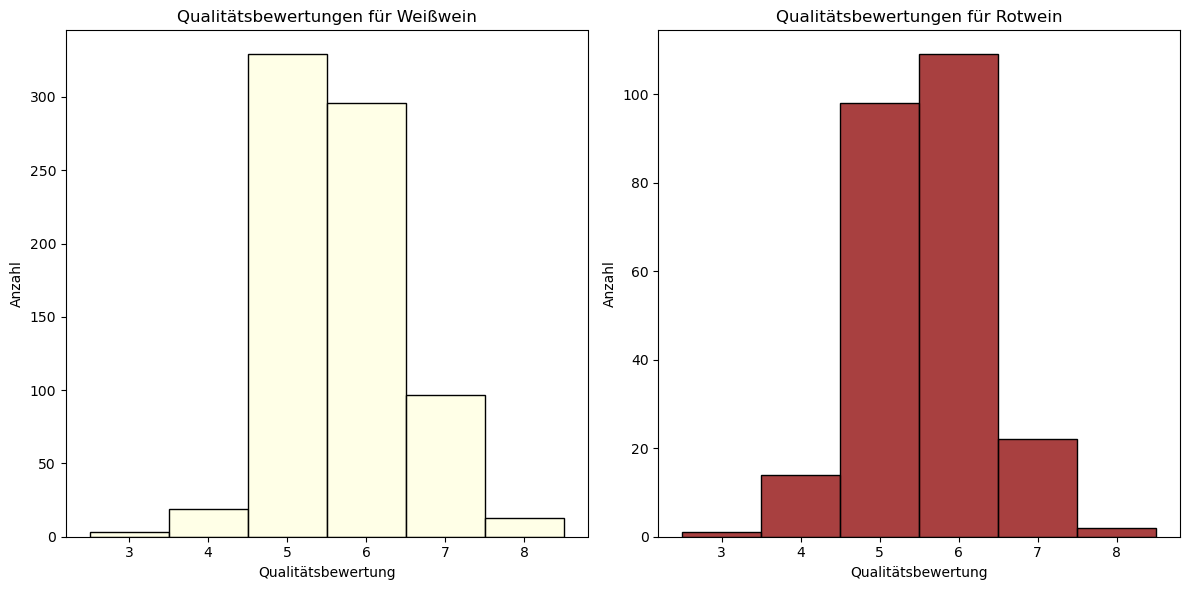

In [61]:
# Histogramme erstellen
plt.figure(figsize=(12, 6))
                    
# Histogramm für Weißwein
plt.subplot(1, 2, 1)
sns.histplot(data=filtered_wine_df[filtered_wine_df['wine_type'] == 'White'], x='quality', bins=bins, color='lightyellow', kde=False)
plt.title('Qualitätsbewertungen für Weißwein')
plt.xlabel('Qualitätsbewertung')
plt.ylabel('Anzahl')

# Histogramm für Rotwein
plt.subplot(1, 2, 2)
sns.histplot(data=filtered_wine_df[filtered_wine_df['wine_type'] == 'Red'], x='quality', bins=bins, color='darkred', kde=False)
plt.title('Qualitätsbewertungen für Rotwein')
plt.xlabel('Qualitätsbewertung')
plt.ylabel('Anzahl')

# Layout anpassen und anzeigen
plt.tight_layout()
plt.show()

**Erkenntnisse:**

- die Qualitätsbewertungen für beide Weinarten sind sehr ähnlich verteilt
- die meisten Weine erhalten mittelmäßige Bewertungen (5/6)
- Mehr Weißweine wurden im Verhältnis als besonders gut bewertet (7/8), aber auch mehr als schlechter (3-5) *- Größere Varianz*
- Rotweine wurden mehr als mittelmäßig bewertet (6)

## **4. Management Summary**

### **4.1 Einschränkungen der Analyse**

- Keine lineare oder normale Verteilung der Werte, selbst nach Log-Transformation und Standardisierung.
- Bestimmte Werte für chemische Eigenschaften sind im Sample unterrepräsentiert, z.B. kein Restzucker über 15,5g/l (fast ausschließlich nur trockene Weine)
- Die abhängige Variable (Qualitätsbewertungen) ist stark geclustert, da subjektive Bewertungen oft zur Mitte tendieren, was präzise Rückschlüsse erschwert.
- Vereinfachte Kategorisierung zwischen Rot- und Weißwein.
- Das prädiktive Modell (Multivariate Regressionsanalyse) hat begrenzte Vorhersagekraft (erklärt nur ca. 36% der Daten). Möglicherweise werden wichtige Variablen in dem Modell nicht berücksichtigt.

### **4.2 Empfohlene Wertebereiche für einflussreiche chemische Eigenschaften**

**Alkohol** (hoch): \
**11.2% - 14.9%** \
36.21% hohe Qualitätsbewertungen und 50.43% mittlere Qualitätsbewertungen (insgesamt 86.64%)

**Flüchtige Säure** (niedrig): \
**0.120g/l - 0.392g/l** \
30.68% hohe Qualitätsbewertungen und 45.42% mittlere Qualitätsbewertungen (insgesamt 76.10%)

**Sulfate** (hoch): \
**0.72mg/l - 2mg/l** \
31.43% hohe Qualitätsbewertungen und 43.67% mittlere Qualitätsbewertungen (insgesamt 75.10%)

**Chloride** (niedrig): \
**0.012g/l - 0.070g/l** \
23.62% hohe Qualitätsbewertungen und 43.91% mittlere Qualitätsbewertungen (insgesamt 67.53%)

**Gesamtschwefeldioxid** (mittelniedrig): \
**21mg/l - 38mg/l** \
19.08% hohe Qualitätsbewertungen und 44.27% mittlere Qualitätsbewertungen (insgesamt 63.35%)

### **4.3 Einflussreiche Interaktionen zwischen chemischen Eigenschaften**

**Positive Auswirkungen auf Qualitätsbewertungen:**  
1. Citronensäure & Feste Säure
- Citronensäure wirkt sich insgesamt positiv und Feste Säure negativ auf die Qualität aus, wenn das jeweils andere Attribut konstant bleibt.
- Interaktion:
- *Der negative Effekt von Fester Säure wird bei höheren Werten von Citronensäure abgemildert.*
- *Ebenso verstärkt sich der positive Effekt von Citronensäure auf die Qualität, wenn Feste Säure steigt.*
- **Ergo: Höhere Konzentrationen von Citronensäure verwenden, um die negativen Auswirkungen von Fester Säure zu minimieren und die positiven Effekte auf die Qualität zu maximieren.**
2. Dichte & Feste Säure
- Dichte hat einen negativen und Feste Säure einen positiven Effekt auf die Qualität.
- Der Interaktionseffekt: *Trotz der negativen Wirkung von Dichte auf die Qualität wird dieser Effekt durch den positiven Einfluss der Festen Säure reduziert.*
- **Ergo: Feste Säure erhöhen, damit der negative Einfluss von Dichte auf die Qualität abgeschwächt und gleichzeitig der positive Effekt von Fester Säure verstärkt wird.**

**Negative Auswirkungen auf Qualitätsbewertungen:**  
1. Gesamschwefeldioxid & Freies Schwefeldioxid
-  Gesamtschwefeldioxid senkt und Freies Schwefeldioxid erhöht die Qualität. 
-  Interaktion: 
-  *Höhere Werte von Gesamtschwefeldioxid reduzieren den positiven Effekt von Freien Schwefeldioxid auf Qualität.*
-  *Höhere Werte von Freien Schwefeldioxid verstärken den negativen Einfluss von Gesamtschwefeldioxid auf die Qualität.*
-  **Ergo: Freies Schwefeldioxid erhöhen, während man Gesamtschwefeldioxid gering hält.**
2. pH & Feste Säure
- Feste Säure hat einen signifikanten positiven Einfluss auf die Qualität, währfend der pH-Wert keinen signifikanten Einfluss hat.
- Interaktion: *Hohe Werte von Fester Säure reduzieren den positiven Einfluss des pH-Werts auf die Qualität und umgekehrt.*
- **Ergo: Da hohe Werte der Feste Säure den positiven Einfluss des pH-Werts auf die Qualität reduzieren und umgekehrt, sollte die Feste Säure optimiert werden, um den pH-Wert nicht negativ zu beeinflussen (extreme Werte vermeiden).**
3. Sulfate & Citronensäure
- Sulfate und Citronensäure haben beide signifikant positive Auswirkungen auf die Qualität.
- Interaktion: *Ein höherer Wert von Citronensäure verringert den positiven Effekt von Sulfaten auf die Qualität und umgekehrt.*
- **Ergo: Trotz der individuellen positiven Auswirkungen von Sulfaten und Citronensäure auf die Qualität, sollte die Verwendung beider Komponenten in hohen Konzentrationen mit Vorsicht erfolgen. Die Wechselwirkung zwischen Sulfaten und Citronensäure kann den positiven Effekt jeder Variable auf die Qualität reduzieren.**

# **Power BI**

#### References

Bendt, S. (2022, 2. April). Was ist der Unterschied zwischen trockenen und lieblichen Weinen? Grapys. https://www.grapys.ch/blogs/wissenswertes/wie-erkennt-man-ob-wein-trocken-oder-lieblich-ist#:~:text=Die%20schnelle%20Antwort%20vorweg%3A,Gramm%20Restzucker%20pro%20Liter%20enth%C3%A4lt. \
\
Schulfer, S. (2024, 29. Juli). Is Wine Acidic? Wine Acid Answers and Low Acid Wines. binwise. https://home.binwise.com/blog/is-wine-acidic \
\
Verordnung (EU) Nr. 1308/2013 des Europäischen Parlaments und des Rates vom 17. Dezember 2013 über eine gemeinsame Marktorganisation für landwirtschaftliche Erzeugnisse und zur Aufhebung der Verordnungen (EWG) Nr. 922/72, (EWG) Nr. 234/79, (EG) Nr. 1037/2001 und (EG) Nr. 1234/2007. Amtsblatt der Europäischen Union, L 347, 20.12.2013, S. 671–854. \
\
Verordnung (EG) Nr. 606/2009 der Kommission vom 10. Juli 2009. Amtsblatt der Europäischen Union, L 193, 24.7.2009, S. 1–59. 


# **Github:**

https://github.com/BrittaGlaser/Capstone-Project